## Módulo 2 - Feature Engineering

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import talib 
import matplotlib.pyplot as plt 

data05 = pd.read_csv("puc_full_3.csv", parse_dates=True)
data05.index = data05["Unnamed: 0"]
data05.index = pd.to_datetime(data05.index)
data05.index.name = "date"
data05.drop(["Unnamed: 0","isPartial"], inplace = True, axis = 1)

In [6]:
data05

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE
date,,,,,,,,,,,
2020-05-04 10:00:00,17.430000,17.620001,17.350000,17.520000,17.520000,0.0,19.840000,5.5746,3.0,7.0,76.0
2020-05-04 11:00:00,17.520000,17.590000,17.410000,17.420000,17.420000,8867100.0,19.809999,5.5906,2.0,5.0,80.0
2020-05-04 12:00:00,17.420000,17.469999,17.230000,17.240000,17.240000,9610700.0,19.870001,5.5712,5.0,13.0,57.0
2020-05-04 13:00:00,17.240000,17.330000,17.230000,17.299999,17.299999,5103400.0,20.200001,5.5680,21.0,21.0,89.0
2020-05-04 14:00:00,17.299999,17.309999,17.200001,17.250000,17.250000,4075100.0,20.219999,5.5626,34.0,37.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30 13:00:00,32.720001,32.779999,32.570000,32.680000,32.680000,6468300.0,106.769997,4.7759,15.0,30.0,43.0
2022-03-30 14:00:00,32.680000,32.750000,32.639999,32.730000,32.730000,3259000.0,107.220001,4.7822,24.0,30.0,54.0
2022-03-30 15:00:00,32.740002,32.849998,32.730000,32.779999,32.779999,7421300.0,107.580002,4.7705,18.0,24.0,48.0


### Estatísticas Descritivas da Amostra coletada

In [7]:
data05.describe()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE
count,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3.078000e+03,2992.000000,3076.000000,3076.000000,3076.000000,3076.000000
mean,25.737027,25.880445,25.593489,25.737199,25.737199,7.946148e+06,61.133309,5.367872,14.116710,20.415800,54.040312
std,3.980247,3.998756,3.961140,3.980788,3.980788,6.219662e+06,19.963099,0.224795,12.182182,11.797439,15.221882
min,16.850000,17.150000,16.740000,16.860001,16.860001,0.000000e+00,19.809999,4.735800,0.000000,0.000000,2.000000
25%,22.600000,22.709999,22.480000,22.600000,22.600000,4.359225e+06,41.485002,5.208800,3.000000,13.000000,46.000000
50%,26.280001,26.435000,26.139999,26.280001,26.280001,6.747450e+06,63.295000,5.359900,12.000000,19.000000,55.000000
75%,28.570000,28.777501,28.440001,28.580000,28.580000,1.018855e+07,73.072500,5.558725,22.000000,26.000000,63.000000
max,35.259998,35.290001,34.750000,34.840000,34.840000,8.312050e+07,128.389999,5.963800,88.000000,100.000000,100.000000


### Tratamento de Dados Faltantes

In [8]:
data05.isna().sum()

Open          1
High          1
Low           1
Close         1
Adj Close     1
Volume        1
oil          87
dollar        3
PETR4         3
PETROBRAS     3
CRISE         3
dtype: int64

In [9]:
data05.loc[data05.index == "2021-12-02 09:00:00"]

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE
date,,,,,,,,,,,
2021-12-02 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,65.43,5.6532,1.0,3.0,13.0


In [10]:
data06 = data05.loc[data05.index != "2021-12-02 09:00:00"]

In [11]:
data06.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
oil          87
dollar        3
PETR4         3
PETROBRAS     3
CRISE         3
dtype: int64

##### Identificando missing values em oil e imputando valores por interpolação linear

<AxesSubplot:xlabel='date'>

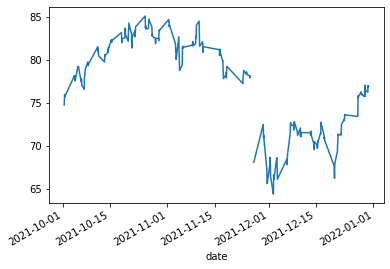

In [12]:
data06.loc["2021-10-01 11:00:00":"2022-01-01 11:00:00", "oil"].plot()

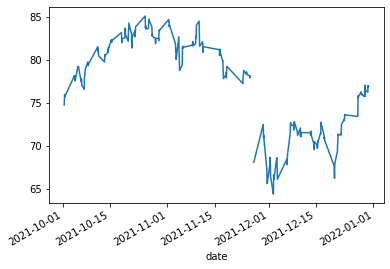

In [13]:
ax = data06.loc["2021-10-01 11:00:00":"2022-01-01 11:00:00", "oil"].plot()
fig = ax.get_figure()
fig.savefig('antes.png')

In [14]:
data06.loc[:, "oil"].interpolate(inplace = True)

<ipython-input-14-496436051d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data06.loc[:, "oil"].interpolate(inplace = True)


<AxesSubplot:xlabel='date'>

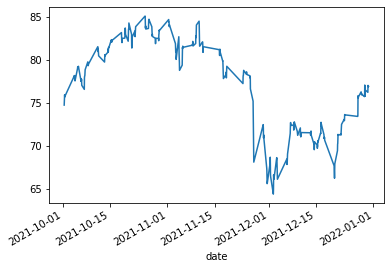

In [15]:
data06.loc["2021-10-01 11:00:00":"2022-01-01 11:00:00", "oil"].plot()

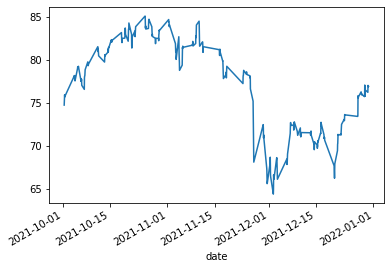

In [16]:
ax = data06.loc["2021-10-01 11:00:00":"2022-01-01 11:00:00", "oil"].plot()
fig = ax.get_figure()
fig.savefig('depois.png')

In [17]:
data06.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
oil          0
dollar       3
PETR4        3
PETROBRAS    3
CRISE        3
dtype: int64

In [18]:
data06["PETR4"][data06["PETR4"].isna()]

date
2021-02-17 15:55:00   NaN
2022-03-02 16:55:00   NaN
2022-04-08 17:00:00   NaN
Name: PETR4, dtype: float64

In [19]:
data06.loc[["2021-02-17 15:55:00","2022-03-02 16:55:00", "2022-04-08 17:00:00"]]

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE
date,,,,,,,,,,,
2021-02-17 15:55:00,28.900000,29.250000,28.870001,29.180000,29.180000,12467800.0,61.035000,NaN,NaN,NaN,NaN
2022-03-02 16:55:00,34.639999,34.779999,34.630001,34.700001,34.700001,13079400.0,108.639999,NaN,NaN,NaN,NaN
2022-04-08 17:00:00,34.209999,34.209999,34.209999,34.209999,34.209999,0.0,107.199997,NaN,NaN,NaN,NaN


In [20]:
data06["dollar"].fillna(method="ffill", inplace = True)
data06["PETR4"].fillna(method="ffill", inplace = True)
data06["PETROBRAS"].fillna(method="ffill", inplace = True)
data06["CRISE"].fillna(method="ffill", inplace = True)

C:\Users\bruno\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
data06.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
oil          0
dollar       0
PETR4        0
PETROBRAS    0
CRISE        0
dtype: int64

In [22]:
data06.to_csv("puc_full_4.csv", date_format = '%Y-%m-%d %H:%M:%S')

### Tratamento de Outliers

<AxesSubplot:>

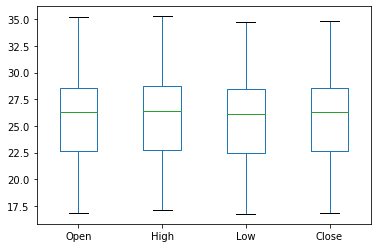

In [23]:
data06[["Open","High","Low","Close"]].plot.box()

<AxesSubplot:>

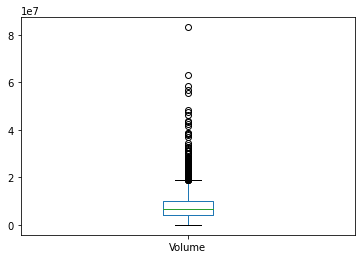

In [24]:
data06["Volume"].plot.box()

<AxesSubplot:xlabel='date'>

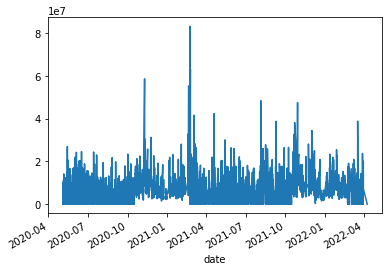

In [25]:
data06["Volume"].plot()

<AxesSubplot:>

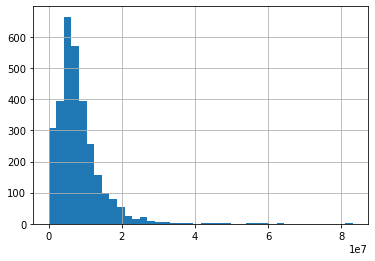

In [26]:
data06["Volume"].hist(bins=40)

<AxesSubplot:xlabel='date'>

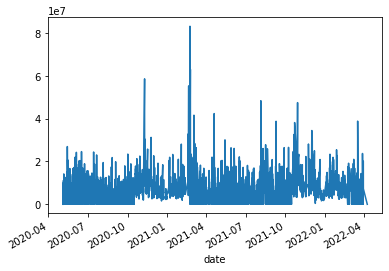

In [27]:
data05["Volume"].plot()

<AxesSubplot:>

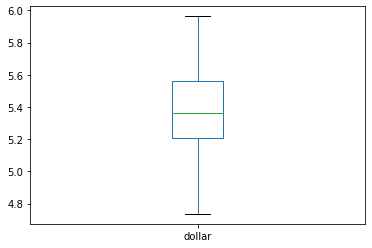

In [28]:
data06["dollar"].plot.box()

<AxesSubplot:>

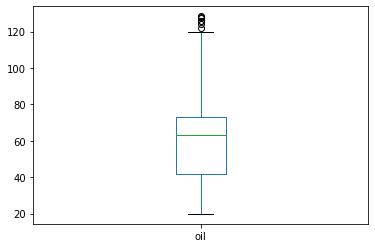

In [29]:
data06["oil"].plot.box()

<AxesSubplot:xlabel='date'>

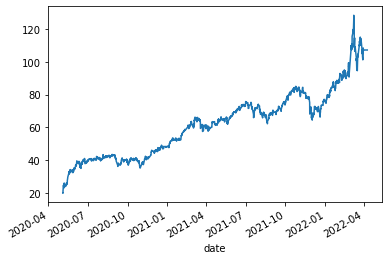

In [30]:
data06["oil"].plot()

<AxesSubplot:>

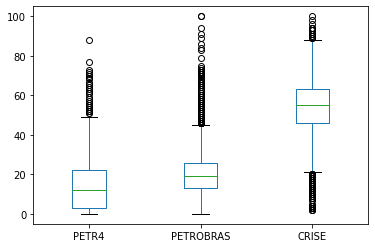

In [31]:
data06[["PETR4","PETROBRAS","CRISE"]].plot.box()

In [32]:
data06

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE
date,,,,,,,,,,,
2020-05-04 10:00:00,17.430000,17.620001,17.350000,17.520000,17.520000,0.0,19.840000,5.5746,3.0,7.0,76.0
2020-05-04 11:00:00,17.520000,17.590000,17.410000,17.420000,17.420000,8867100.0,19.809999,5.5906,2.0,5.0,80.0
2020-05-04 12:00:00,17.420000,17.469999,17.230000,17.240000,17.240000,9610700.0,19.870001,5.5712,5.0,13.0,57.0
2020-05-04 13:00:00,17.240000,17.330000,17.230000,17.299999,17.299999,5103400.0,20.200001,5.5680,21.0,21.0,89.0
2020-05-04 14:00:00,17.299999,17.309999,17.200001,17.250000,17.250000,4075100.0,20.219999,5.5626,34.0,37.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30 13:00:00,32.720001,32.779999,32.570000,32.680000,32.680000,6468300.0,106.769997,4.7759,15.0,30.0,43.0
2022-03-30 14:00:00,32.680000,32.750000,32.639999,32.730000,32.730000,3259000.0,107.220001,4.7822,24.0,30.0,54.0
2022-03-30 15:00:00,32.740002,32.849998,32.730000,32.779999,32.779999,7421300.0,107.580002,4.7705,18.0,24.0,48.0


#### Substituindo ouliers por valores mais comportados de acordo com a função ts_outliers do pacote R forecast

In [33]:
outlier_vol = pd.read_csv("outlier_vol.csv")
outlier_oil = pd.read_csv("outlier_oil.csv")
outlier_PETR4 = pd.read_csv("outlier_PETR4.csv")
outlier_PETROBRAS = pd.read_csv("outlier_PETROBRAS.csv")

In [34]:
outlier_PETROBRAS

,Unnamed: 0,i_PETROBRAS,a_PETROBRAS,r_PETROBRAS
0,1,1295,74,59.500000
1,2,1302,79,71.500000
2,3,1367,83,45.500000
3,4,2439,65,33.500000
4,5,2636,94,27.333333
5,6,2637,73,25.666667
6,7,2638,100,24.000000
7,8,2639,66,22.333333
8,9,2640,71,20.666667
9,10,2703,73,56.800000


In [35]:
outlier_vol.rename(columns = {'a_vol':'Volume'}, inplace = True)
outlier_oil.rename(columns = {'a_oil':'oil'}, inplace = True)
outlier_PETR4.rename(columns = {'a_PETR4':'PETR4'}, inplace = True)
outlier_PETROBRAS.rename(columns = {'a_PETROBRAS':'PETROBRAS'}, inplace = True)


In [36]:
data06["date"] = data06.index

<ipython-input-36-4371d57a65ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data06["date"] = data06.index


In [37]:
outlier_PETR4.head()

,Unnamed: 0,i_PETR4,PETR4,r_PETR4
0,1,1295,88,71.5
1,2,2067,77,30.0


In [38]:
data07 = pd.merge(data06, outlier_vol[["Volume","r_vol"]], how = "left", on = "Volume")
data08 = pd.merge(data07, outlier_oil[["oil","r_oil"]], how = "left", on = "oil")
data09 = pd.merge(data08, outlier_PETR4[["PETR4","r_PETR4"]], how = "left", on = "PETR4")
data10 = pd.merge(data09, outlier_PETROBRAS[["PETROBRAS","r_PETROBRAS"]], how = "left", on = "PETROBRAS")

In [39]:
data10.index = data10["date"]

In [40]:
data10["r_vol"] = np.where(data10["r_vol"].isna(), data10["Volume"], data10["r_vol"])
data10["r_oil"] = np.where(data10["r_oil"].isna(), data10["oil"], data10["r_oil"])
data10["r_PETR4"] = np.where(data10["r_PETR4"].isna(), data10["PETR4"], data10["r_PETR4"])
data10["r_PETROBRAS"] = np.where(data10["r_PETROBRAS"].isna(), data10["PETROBRAS"], data10["r_PETROBRAS"])

In [41]:
data10.head()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE,date,r_vol,r_oil,r_PETR4,r_PETROBRAS
date,,,,,,,,,,,,,,,,
2020-05-04 10:00:00,17.430000,17.620001,17.350000,17.520000,17.520000,0.0,19.840000,5.5746,3.0,7.0,76.0,2020-05-04 10:00:00,0.0,19.840000,3.0,7.0
2020-05-04 11:00:00,17.520000,17.590000,17.410000,17.420000,17.420000,8867100.0,19.809999,5.5906,2.0,5.0,80.0,2020-05-04 11:00:00,8867100.0,19.809999,2.0,5.0
2020-05-04 12:00:00,17.420000,17.469999,17.230000,17.240000,17.240000,9610700.0,19.870001,5.5712,5.0,13.0,57.0,2020-05-04 12:00:00,9610700.0,19.870001,5.0,13.0
2020-05-04 13:00:00,17.240000,17.330000,17.230000,17.299999,17.299999,5103400.0,20.200001,5.5680,21.0,21.0,89.0,2020-05-04 13:00:00,5103400.0,20.200001,21.0,21.0
2020-05-04 14:00:00,17.299999,17.309999,17.200001,17.250000,17.250000,4075100.0,20.219999,5.5626,34.0,37.0,63.0,2020-05-04 14:00:00,4075100.0,20.219999,34.0,37.0


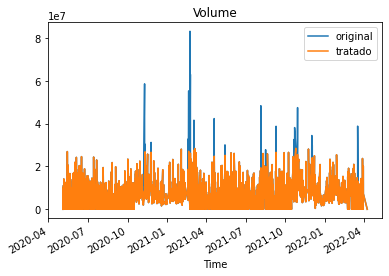

In [42]:
data10["Volume"].plot(label ="original")
data10["r_vol"].plot(label ="tratado")
plt.title('Volume')
plt.xlabel('Time')
plt.legend()

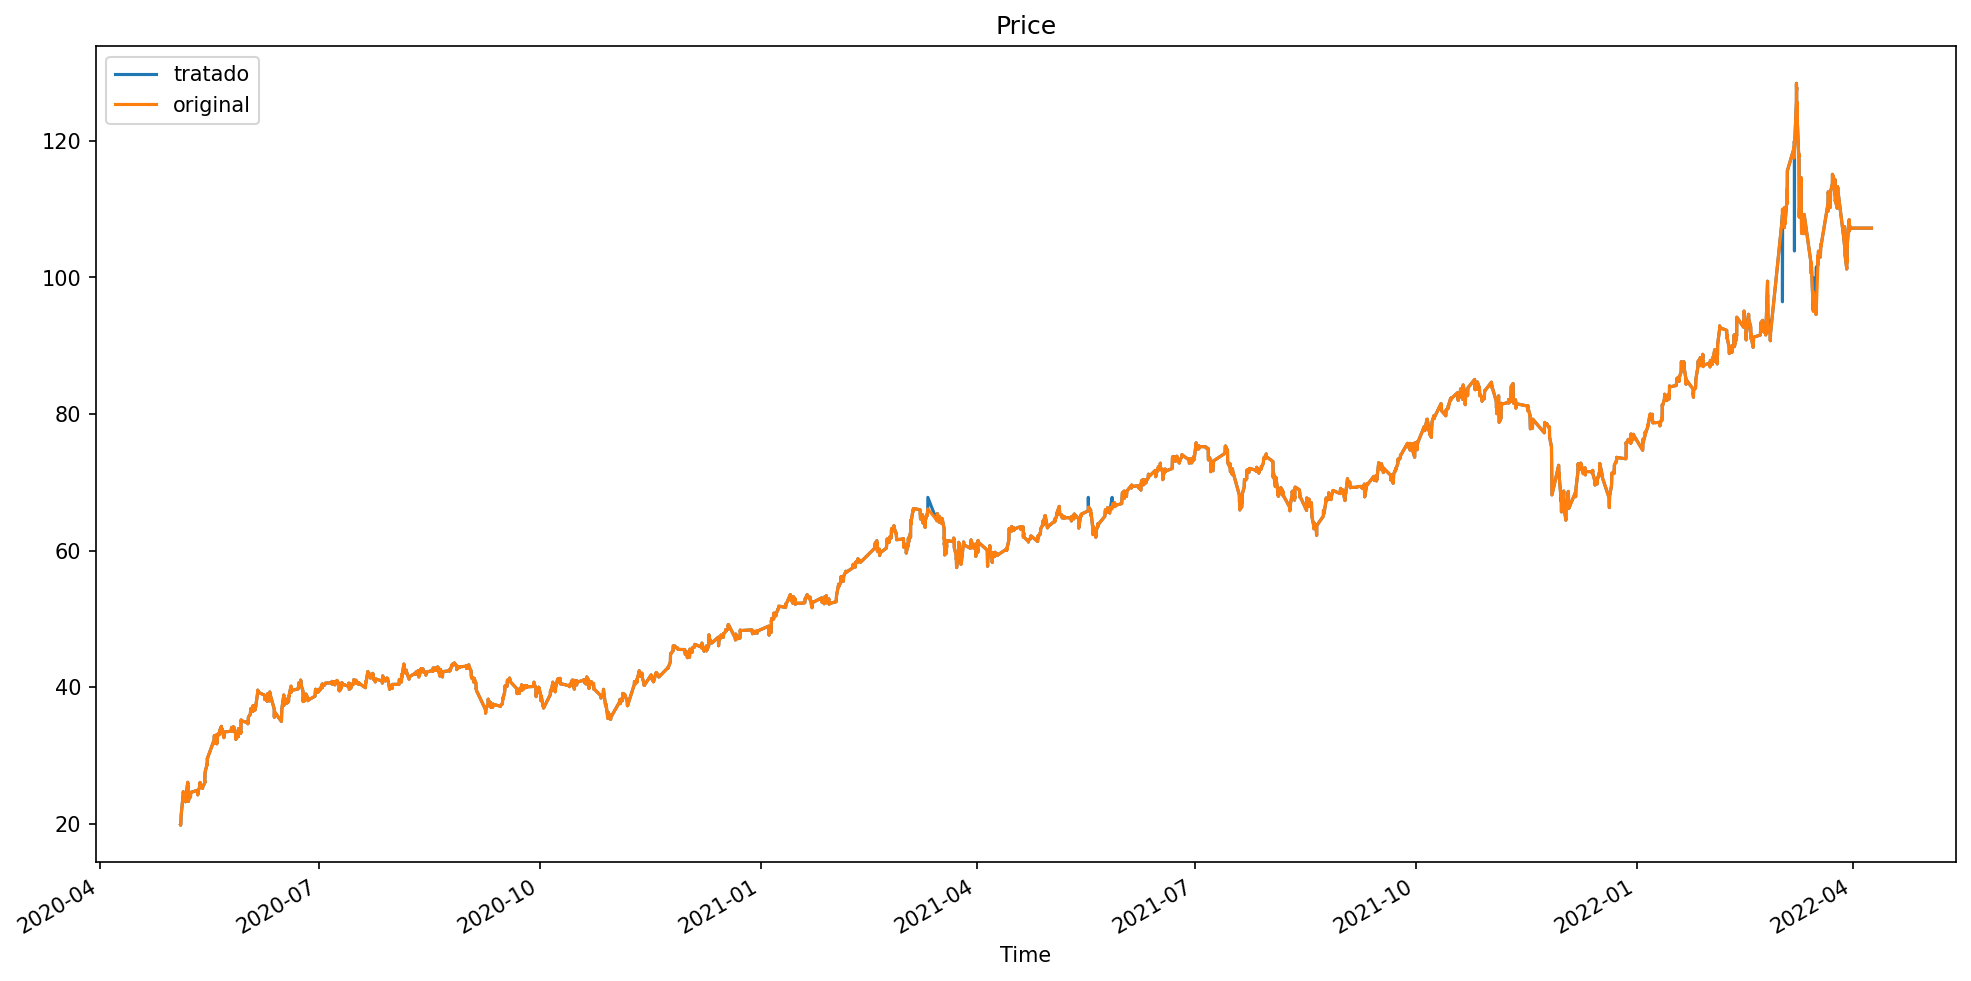

In [43]:

plt.figure(figsize=(16, 8), dpi=150)
data10["r_oil"].plot(label ="tratado")
data10["oil"].plot(label ="original")


plt.title('Price')
plt.xlabel('Time')
plt.legend()

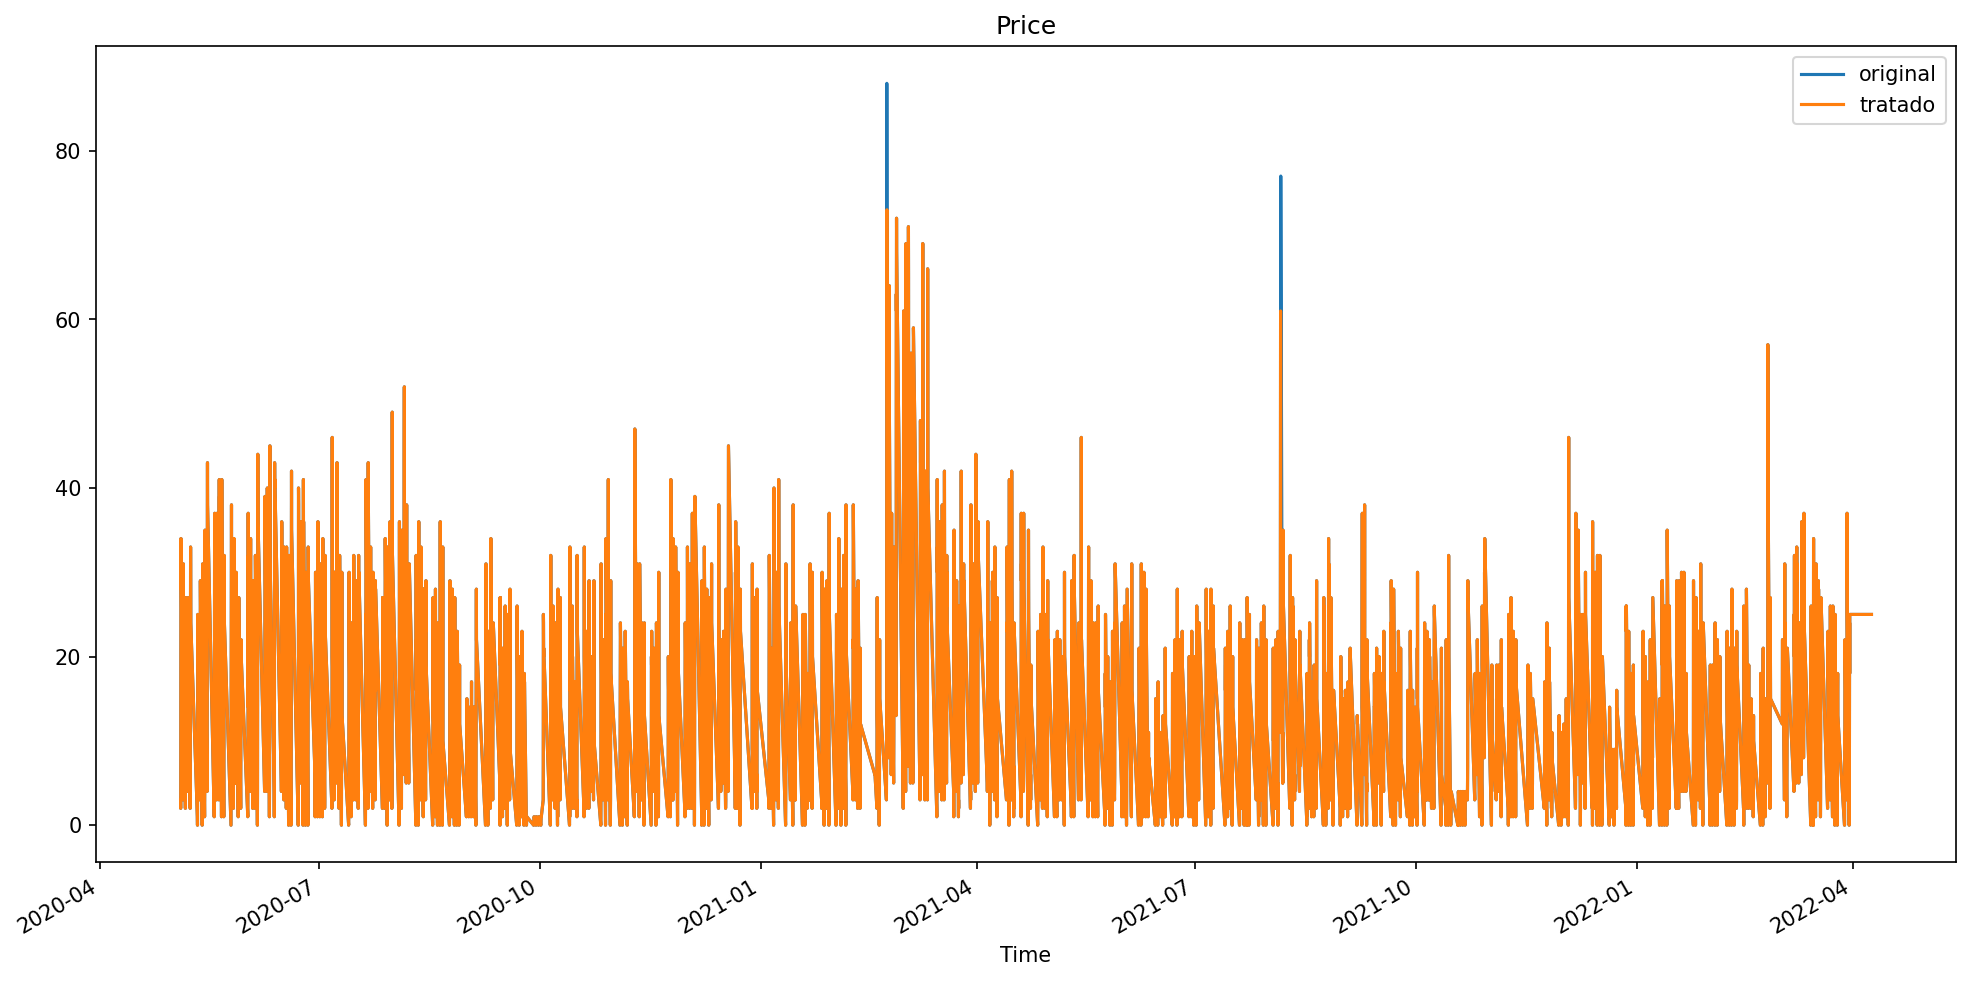

In [44]:
plt.figure(figsize=(16, 8), dpi=150)
data10["PETR4"].plot(label ="original")
data10["r_PETR4"].plot(label ="tratado")

plt.title('Price')
plt.xlabel('Time')
plt.legend()

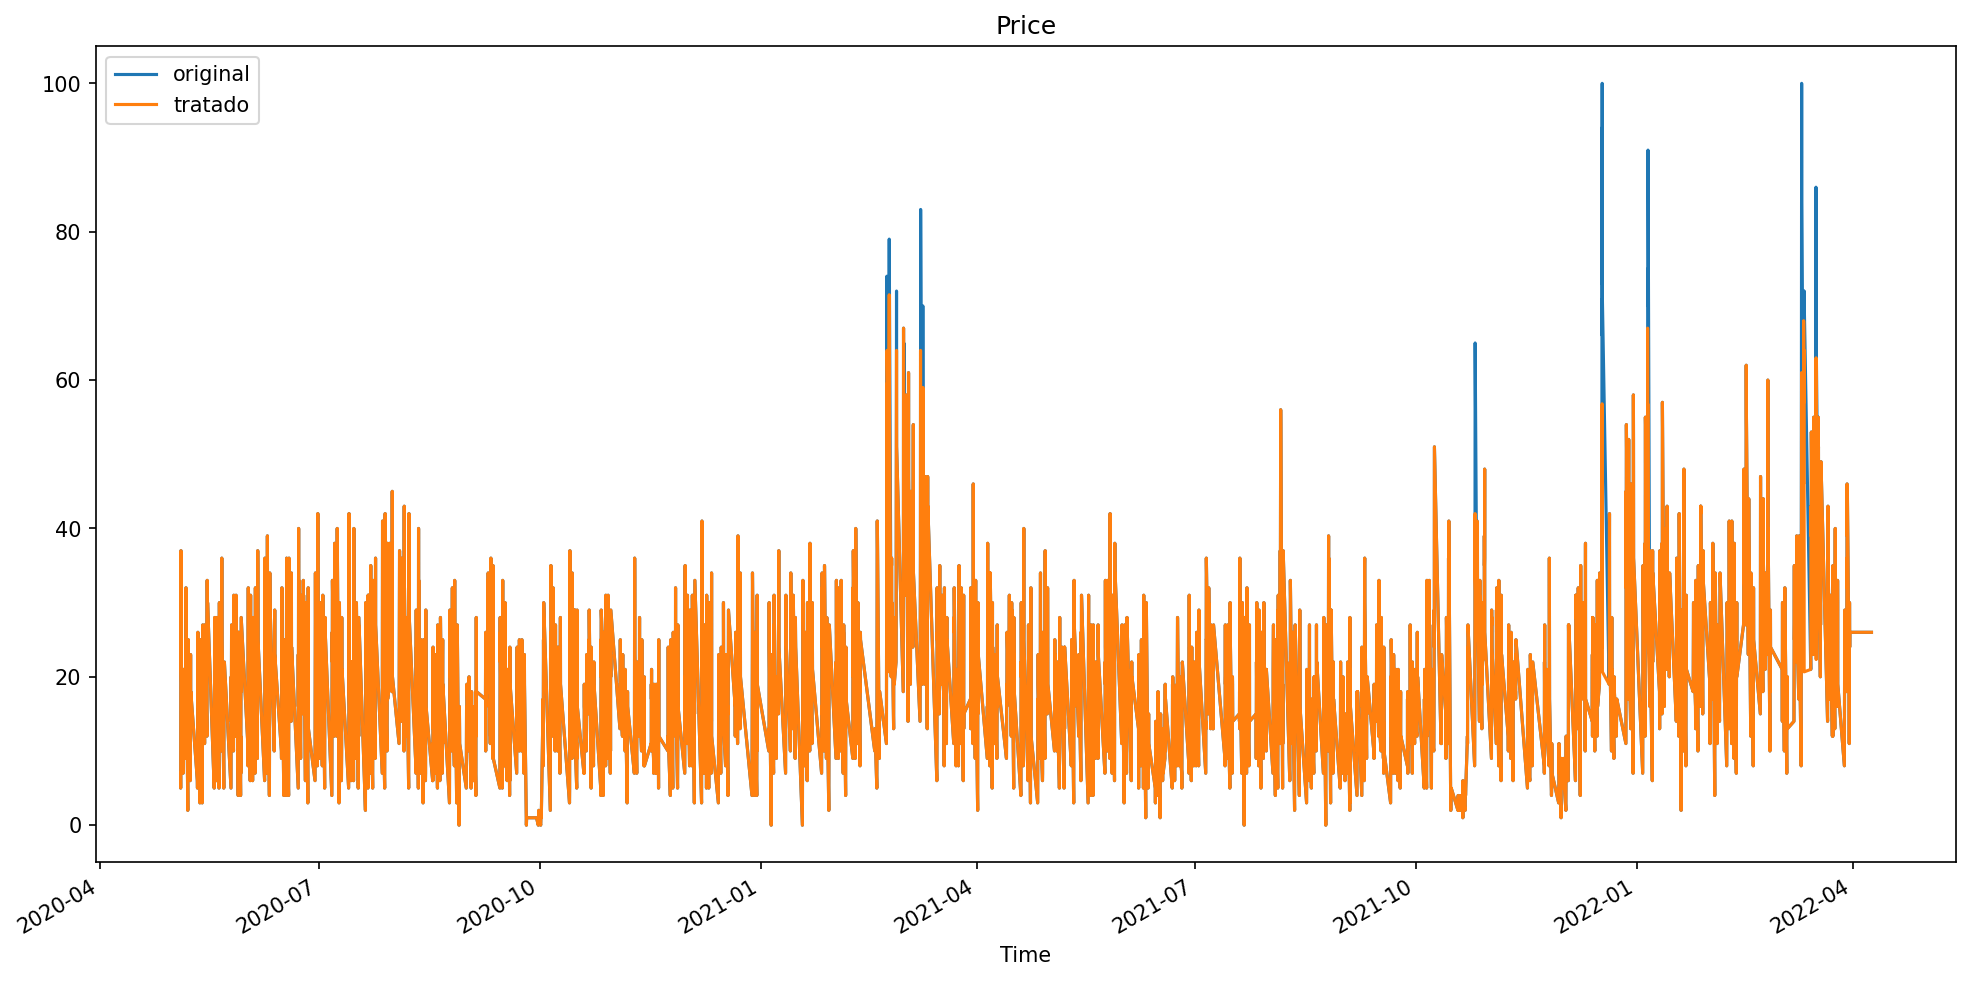

In [45]:
plt.figure(figsize=(16, 8), dpi=150)
data10["PETROBRAS"].plot(label ="original")
data10["r_PETROBRAS"].plot(label ="tratado")

plt.title('Price')
plt.xlabel('Time')
plt.legend()

### Criando o target

In [46]:
data10["variacao"] = data10["Close"].pct_change()

In [47]:
data10["target"] = np.where(data10["Close"].pct_change()>0, 1, 0)

In [48]:
data10.head()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE,date,r_vol,r_oil,r_PETR4,r_PETROBRAS,variacao,target
date,,,,,,,,,,,,,,,,,,
2020-05-04 10:00:00,17.430000,17.620001,17.350000,17.520000,17.520000,0.0,19.840000,5.5746,3.0,7.0,76.0,2020-05-04 10:00:00,0.0,19.840000,3.0,7.0,NaN,0
2020-05-04 11:00:00,17.520000,17.590000,17.410000,17.420000,17.420000,8867100.0,19.809999,5.5906,2.0,5.0,80.0,2020-05-04 11:00:00,8867100.0,19.809999,2.0,5.0,-0.005708,0
2020-05-04 12:00:00,17.420000,17.469999,17.230000,17.240000,17.240000,9610700.0,19.870001,5.5712,5.0,13.0,57.0,2020-05-04 12:00:00,9610700.0,19.870001,5.0,13.0,-0.010333,0
2020-05-04 13:00:00,17.240000,17.330000,17.230000,17.299999,17.299999,5103400.0,20.200001,5.5680,21.0,21.0,89.0,2020-05-04 13:00:00,5103400.0,20.200001,21.0,21.0,0.003480,1
2020-05-04 14:00:00,17.299999,17.309999,17.200001,17.250000,17.250000,4075100.0,20.219999,5.5626,34.0,37.0,63.0,2020-05-04 14:00:00,4075100.0,20.219999,34.0,37.0,-0.002890,0


In [49]:
data10 = data10.loc[data10.index > "2020-05-04 10:00:00"]

In [50]:
data10.head()

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,CRISE,date,r_vol,r_oil,r_PETR4,r_PETROBRAS,variacao,target
date,,,,,,,,,,,,,,,,,,
2020-05-04 11:00:00,17.520000,17.590000,17.410000,17.420000,17.420000,8867100.0,19.809999,5.5906,2.0,5.0,80.0,2020-05-04 11:00:00,8867100.0,19.809999,2.0,5.0,-0.005708,0
2020-05-04 12:00:00,17.420000,17.469999,17.230000,17.240000,17.240000,9610700.0,19.870001,5.5712,5.0,13.0,57.0,2020-05-04 12:00:00,9610700.0,19.870001,5.0,13.0,-0.010333,0
2020-05-04 13:00:00,17.240000,17.330000,17.230000,17.299999,17.299999,5103400.0,20.200001,5.5680,21.0,21.0,89.0,2020-05-04 13:00:00,5103400.0,20.200001,21.0,21.0,0.003480,1
2020-05-04 14:00:00,17.299999,17.309999,17.200001,17.250000,17.250000,4075100.0,20.219999,5.5626,34.0,37.0,63.0,2020-05-04 14:00:00,4075100.0,20.219999,34.0,37.0,-0.002890,0
2020-05-04 15:00:00,17.250000,17.379999,17.180000,17.330000,17.330000,7507000.0,20.870001,5.5505,28.0,24.0,60.0,2020-05-04 15:00:00,7507000.0,20.870001,28.0,24.0,0.004638,1


In [51]:
data10.target.mean()

0.4875283446712018

In [52]:
data10.isna().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
oil            0
dollar         0
PETR4          0
PETROBRAS      0
CRISE          0
date           0
r_vol          0
r_oil          0
r_PETR4        0
r_PETROBRAS    0
variacao       0
target         0
dtype: int64

### Indicadores Técnicos


In [53]:
from talib import RSI, BBANDS, MACD, ATR

data10.loc[:,"ma24"] = data10["Close"].rolling(window = 24).mean()

data10.loc[:,"rsi"] = RSI(data10["Close"], timeperiod=14)

data10.loc[:,"up"], data10.loc[:,"mid"], data10.loc[:,"down"] = BBANDS(data10["Close"], timeperiod=21, nbdevup=2, nbdevdn=2, 
                      matype=0)

data10.loc[:,"atr"] = ATR(data10["High"], data10["Low"], data10["Close"], timeperiod=14)

data10.loc[:,"macd"], data10.loc[:,"macdsignal"], data10.loc[:,"macdhist"] = MACD(data10["Close"], fastperiod=12, slowperiod=26, signalperiod=9)


In [54]:
data10.head(40)

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,...,target,ma24,rsi,up,mid,down,atr,macd,macdsignal,macdhist
date,,,,,,,,,,,,,,,,,,,,,
2020-05-04 11:00:00,17.520000,17.590000,17.410000,17.420000,17.420000,8867100.0,19.809999,5.5906,2.0,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04 12:00:00,17.420000,17.469999,17.230000,17.240000,17.240000,9610700.0,19.870001,5.5712,5.0,13.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04 13:00:00,17.240000,17.330000,17.230000,17.299999,17.299999,5103400.0,20.200001,5.5680,21.0,21.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04 14:00:00,17.299999,17.309999,17.200001,17.250000,17.250000,4075100.0,20.219999,5.5626,34.0,37.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04 15:00:00,17.250000,17.379999,17.180000,17.330000,17.330000,7507000.0,20.870001,5.5505,28.0,24.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04 16:00:00,17.320000,17.570000,17.280001,17.379999,17.379999,9918000.0,21.270000,5.5210,32.0,22.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05 10:00:00,17.900000,18.480000,17.889999,18.410000,18.410000,0.0,24.020000,5.5003,3.0,9.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05 11:00:00,18.410000,18.450001,18.139999,18.200001,18.200001,8628600.0,23.400000,5.5506,7.0,7.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05 12:00:00,18.200001,18.389999,18.170000,18.330000,18.330000,6708500.0,24.020000,5.5596,9.0,11.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
data10.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
oil             0
dollar          0
PETR4           0
PETROBRAS       0
CRISE           0
date            0
r_vol           0
r_oil           0
r_PETR4         0
r_PETROBRAS     0
variacao        0
target          0
ma24           23
rsi            14
up             20
mid            20
down           20
atr            14
macd           33
macdsignal     33
macdhist       33
dtype: int64

### Excluindo 33 primeiros registros utilizados para os cálculos de indicadores

In [56]:
data11 = data10.loc[data10.index>"2020-05-08 15:00:00"]

In [57]:
data11.isna().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
oil            0
dollar         0
PETR4          0
PETROBRAS      0
CRISE          0
date           0
r_vol          0
r_oil          0
r_PETR4        0
r_PETROBRAS    0
variacao       0
target         0
ma24           0
rsi            0
up             0
mid            0
down           0
atr            0
macd           0
macdsignal     0
macdhist       0
dtype: int64

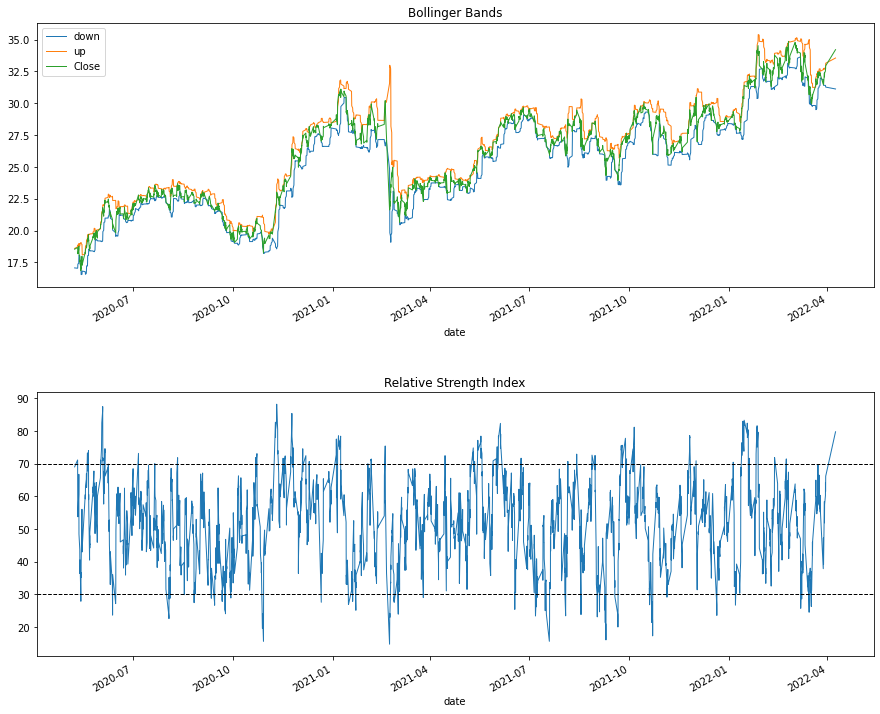

In [58]:
import matplotlib.pyplot as plt

fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
data11[['down','up', "Close"]].plot(ax=axes[0], lw=1, title='Bollinger Bands')
data11['rsi'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
plt.subplots_adjust(top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)

<AxesSubplot:>

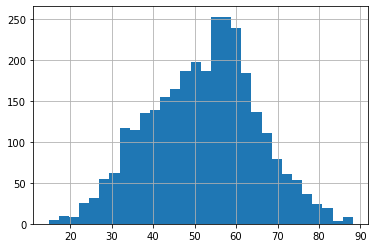

In [59]:
data11["rsi"].hist(bins=30)

### Criando indicadores dummy, com base na teoria de análise técnica de ativos

In [60]:
data11["bbands"] = np.where(data11["Close"]<data11["down"]*1.01, 1, 0)

<ipython-input-60-fe4bbee40f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data11["bbands"] = np.where(data11["Close"]<data11["down"]*1.01, 1, 0)


In [61]:
data11["rsi_dummy"] = np.where(data11["rsi"]<35, 1, 0)

<ipython-input-61-5b5b87addb0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data11["rsi_dummy"] = np.where(data11["rsi"]<35, 1, 0)


In [62]:
data11["atr_dummy"] = np.where(data11["Close"]>data11["Open"]+0.5*data11["atr"], 1, 0)

<ipython-input-62-1423bc32c1cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data11["atr_dummy"] = np.where(data11["Close"]>data11["Open"]+0.5*data11["atr"], 1, 0)


In [63]:
data11.tail(50)

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,...,up,mid,down,atr,macd,macdsignal,macdhist,bbands,rsi_dummy,atr_dummy
date,,,,,,,,,,,,,,,,,,,,,
2022-03-22 10:00:00,31.990000,32.099998,31.549999,31.690001,31.690001,0.0,110.699997,4.9251,5.0,17.0,...,32.140002,30.853333,29.566664,0.416296,0.178135,0.005792,0.172343,0,0,0
2022-03-22 11:00:00,31.690001,31.730000,31.370001,31.580000,31.580000,9668800.0,110.730003,4.9222,3.0,24.0,...,32.201266,30.922857,29.644448,0.412275,0.181802,0.040994,0.140808,0,0,0
2022-03-22 12:00:00,31.580000,31.620001,31.350000,31.459999,31.459999,5870800.0,110.209999,4.9360,9.0,17.0,...,32.233410,30.985714,29.738018,0.402113,0.173031,0.067401,0.105630,0,0,0
2022-03-22 13:00:00,31.450001,31.590000,31.440001,31.559999,31.559999,3308800.0,110.260002,4.9338,19.0,28.0,...,32.274701,31.047143,29.819584,0.384105,0.172164,0.088354,0.083810,0,0,0
2022-03-22 14:00:00,31.549999,31.760000,31.540001,31.639999,31.639999,9097900.0,111.720001,4.9225,26.0,31.0,...,32.326262,31.103333,29.880404,0.372383,0.175905,0.105864,0.070041,0,0,0
2022-03-22 15:00:00,31.639999,31.690001,31.440001,31.590000,31.590000,6497300.0,111.300003,4.9178,20.0,25.0,...,32.313006,31.179048,30.045089,0.363641,0.172843,0.119260,0.053583,0,0,0
2022-03-22 16:00:00,31.590000,31.600000,31.440001,31.549999,31.549999,6905500.0,112.515003,4.9149,16.0,25.0,...,32.255802,31.255238,30.254674,0.349095,0.165283,0.128465,0.036818,0,0,0
2022-03-23 10:00:00,31.930000,32.150002,31.690001,31.990000,31.990000,0.0,113.730003,4.8815,1.0,12.0,...,32.310247,31.327619,30.344991,0.367017,0.192576,0.141287,0.051289,0,0,0
2022-03-23 11:00:00,31.980000,32.230000,31.850000,32.119999,32.119999,7781400.0,115.080002,4.8520,1.0,26.0,...,32.391146,31.395238,30.399330,0.367945,0.222135,0.157457,0.064679,0,0,0


In [64]:
data11["atr_dummy"].mean()

0.15553372626064177

Ajuste de target para que features passadas prevejam target futuro:

In [65]:
data11["target"] = data11["target"].shift(periods=-1)

<ipython-input-65-f43dc72f41dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data11["target"] = data11["target"].shift(periods=-1)


In [66]:
data11.tail(50)

,Open,High,Low,Close,Adj Close,Volume,oil,dollar,PETR4,PETROBRAS,...,up,mid,down,atr,macd,macdsignal,macdhist,bbands,rsi_dummy,atr_dummy
date,,,,,,,,,,,,,,,,,,,,,
2022-03-22 10:00:00,31.990000,32.099998,31.549999,31.690001,31.690001,0.0,110.699997,4.9251,5.0,17.0,...,32.140002,30.853333,29.566664,0.416296,0.178135,0.005792,0.172343,0,0,0
2022-03-22 11:00:00,31.690001,31.730000,31.370001,31.580000,31.580000,9668800.0,110.730003,4.9222,3.0,24.0,...,32.201266,30.922857,29.644448,0.412275,0.181802,0.040994,0.140808,0,0,0
2022-03-22 12:00:00,31.580000,31.620001,31.350000,31.459999,31.459999,5870800.0,110.209999,4.9360,9.0,17.0,...,32.233410,30.985714,29.738018,0.402113,0.173031,0.067401,0.105630,0,0,0
2022-03-22 13:00:00,31.450001,31.590000,31.440001,31.559999,31.559999,3308800.0,110.260002,4.9338,19.0,28.0,...,32.274701,31.047143,29.819584,0.384105,0.172164,0.088354,0.083810,0,0,0
2022-03-22 14:00:00,31.549999,31.760000,31.540001,31.639999,31.639999,9097900.0,111.720001,4.9225,26.0,31.0,...,32.326262,31.103333,29.880404,0.372383,0.175905,0.105864,0.070041,0,0,0
2022-03-22 15:00:00,31.639999,31.690001,31.440001,31.590000,31.590000,6497300.0,111.300003,4.9178,20.0,25.0,...,32.313006,31.179048,30.045089,0.363641,0.172843,0.119260,0.053583,0,0,0
2022-03-22 16:00:00,31.590000,31.600000,31.440001,31.549999,31.549999,6905500.0,112.515003,4.9149,16.0,25.0,...,32.255802,31.255238,30.254674,0.349095,0.165283,0.128465,0.036818,0,0,0
2022-03-23 10:00:00,31.930000,32.150002,31.690001,31.990000,31.990000,0.0,113.730003,4.8815,1.0,12.0,...,32.310247,31.327619,30.344991,0.367017,0.192576,0.141287,0.051289,0,0,0
2022-03-23 11:00:00,31.980000,32.230000,31.850000,32.119999,32.119999,7781400.0,115.080002,4.8520,1.0,26.0,...,32.391146,31.395238,30.399330,0.367945,0.222135,0.157457,0.064679,0,0,0


<AxesSubplot:>

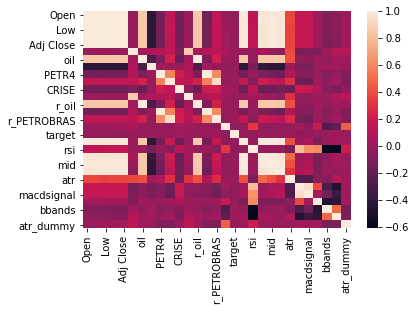

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data11.corr())

In [68]:
data11.corr().loc["target"]

Open          -0.009951
High          -0.010836
Low           -0.011026
Close         -0.011554
Adj Close     -0.011554
Volume         0.000993
oil            0.000374
dollar         0.003086
PETR4         -0.001834
PETROBRAS      0.006818
CRISE          0.015548
r_vol          0.005117
r_oil          0.000406
r_PETR4       -0.000184
r_PETROBRAS    0.022157
variacao      -0.028997
target         1.000000
ma24          -0.006810
rsi           -0.026020
up            -0.006037
mid           -0.007247
down          -0.008379
atr            0.009460
macd          -0.026202
macdsignal    -0.022908
macdhist      -0.014738
bbands         0.014412
rsi_dummy      0.020389
atr_dummy     -0.013577
Name: target, dtype: float64